#Países que ocupan energía nuclear vs energia solar
- Analyze access, density, and growth for equitable distribution.
- Guide investors towards sustainable opportunities.
- Eficiencia de cada país de energia nuclear vs energia solar
- Consumo per cápita de electricidad nuclear vs población
- Consumo per cápita de electricidad solar vs población

In [1]:
import requests
import pandas as pd
import os

In [2]:
csv_reader="/Users/kevindorado/Desktop/Project 1/Project-1/Copia de global-data-on-sustainable-energy (1).csv"
global_data=pd.read_csv(csv_reader)
global_df=pd.DataFrame(global_data)
global_df.dropna()
global_df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


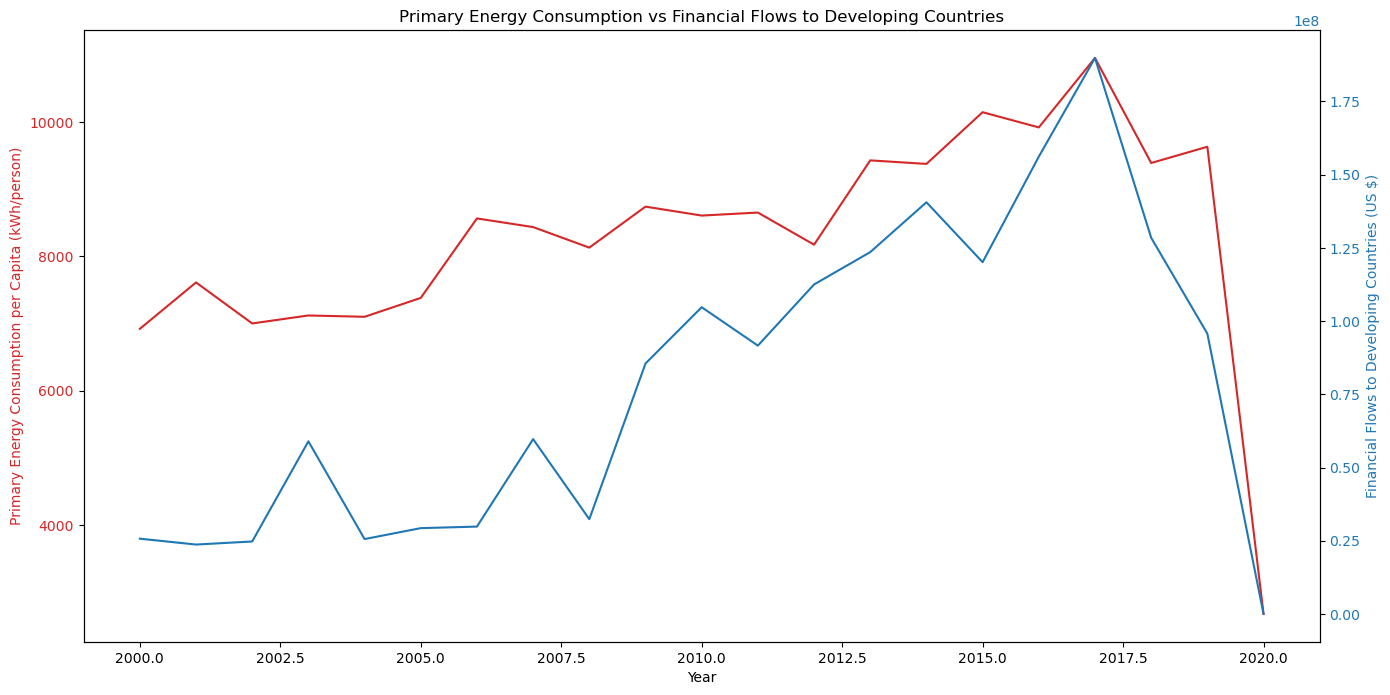

In [3]:
import matplotlib.pyplot as plt

# Cambiando el nombre de 'df_analysis' a 'energy_financial_df' para reflejar mejor la información que contiene
energy_financial_df = global_df[['Year', 'Primary energy consumption per capita (kWh/person)', 
                                 'Financial flows to developing countries (US $)']].dropna()

# Agrupar por año y calcular la media de consumo de energía primaria y flujos financieros
annual_averages = energy_financial_df.groupby('Year').mean().reset_index()

# Crear un gráfico de dos ejes para comparar las tendencias
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Primary Energy Consumption per Capita (kWh/person)', color=color)
ax1.plot(annual_averages['Year'], annual_averages['Primary energy consumption per capita (kWh/person)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje Y para los flujos financieros
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Financial Flows to Developing Countries (US $)', color=color)  
ax2.plot(annual_averages['Year'], annual_averages['Financial flows to developing countries (US $)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Primary Energy Consumption vs Financial Flows to Developing Countries')
plt.show()




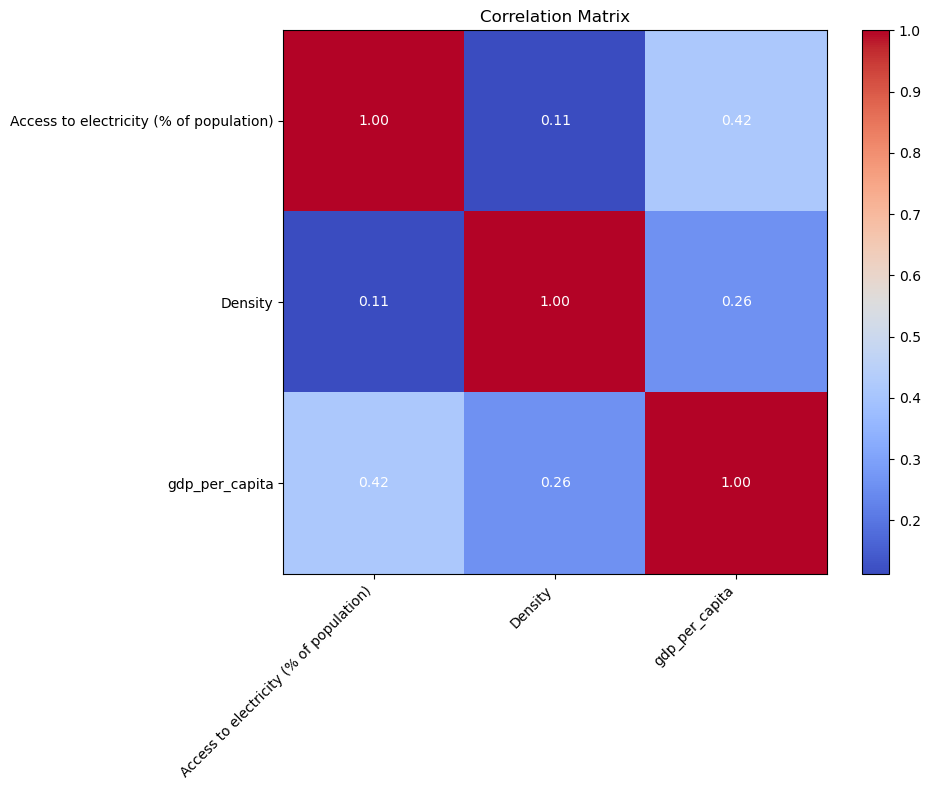

In [ ]:
# Ajustemos el código para que la matriz de correlación sea más legible y tenga las anotaciones correctas.

# Primero, necesitamos calcular la matriz de correlación de nuevo
# porque no tenemos acceso al dataframe desde aquí.
# Así que este paso se supone que se ejecuta en tu entorno local.

# Suponiendo que las columnas son 'Access to electricity (% of population)', 'Density', 'gdp_per_capita'
# y están presentes en 'global_df':

correlations = global_df[['Access to electricity (% of population)', 'Density', 'gdp_per_capita']].corr()

# Ahora vamos a generar un gráfico de calor con las anotaciones de las correlaciones
# y asegurándonos de que las etiquetas sean legibles.

plt.figure(figsize=(10, 8))
heatmap = plt.imshow(correlations, interpolation='nearest', cmap='coolwarm')
plt.colorbar(heatmap)

# Añadir las etiquetas de las correlaciones a las celdas
for i in range(len(correlations.columns)):
    for j in range(len(correlations.columns)):
        text = plt.text(j, i, "{:.2f}".format(correlations.iloc[i, j]),
                       ha="center", va="center", color="w")

# Ajustar los ticks y colocar las etiquetas de los ejes
plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=45, horizontalalignment='right')
plt.yticks(range(len(correlations.columns)), correlations.columns)

# Títulos y etiquetas
plt.title('Correlation Matrix')

# Mostrar el gráfico
plt.tight_layout()  # Esta función ajusta automáticamente los subplots para que se ajusten al área del gráfico.
plt.show()



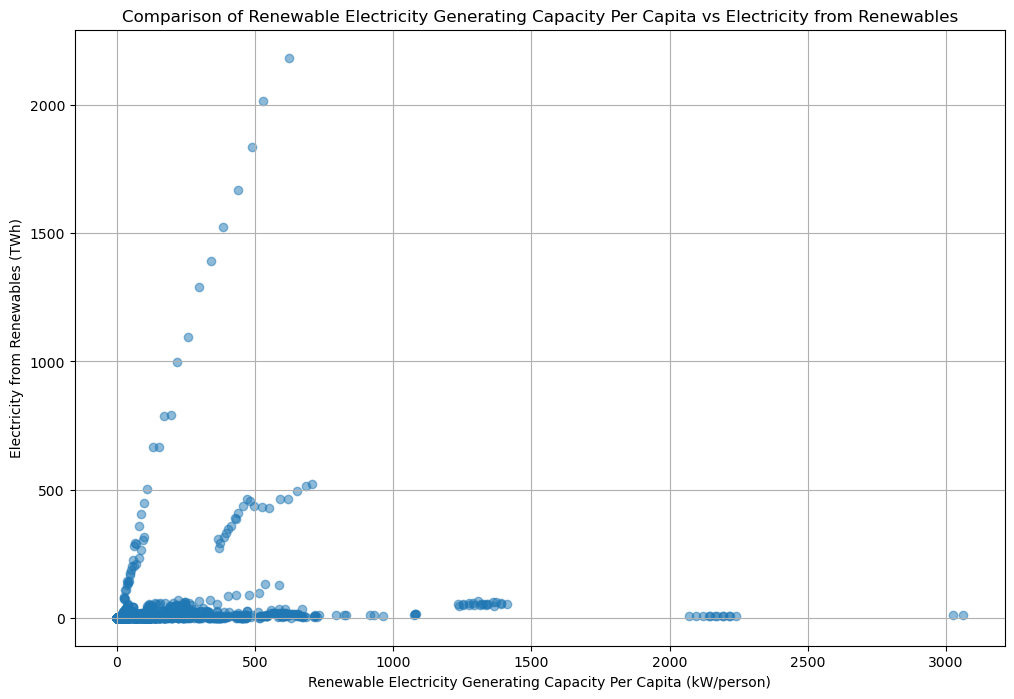

In [ ]:
# Asumiendo que ya tenemos el dataframe 'global_df' cargado y que incluye las columnas necesarias.
# Vamos a generar un gráfico de dispersión para comparar la capacidad de generación de electricidad renovable per cápita
# con la electricidad generada a partir de fuentes renovables en términos absolutos (TWh).

renewable_capacity_col = 'Renewable-electricity-generating-capacity-per-capita'
renewable_electricity_col = 'Electricity from renewables (TWh)'

# Filtramos para asegurarnos de que no hay valores nulos que puedan causar errores en el gráfico.
df_clean = global_df.dropna(subset=[renewable_capacity_col, renewable_electricity_col])

# Generamos el gráfico de dispersión.
plt.figure(figsize=(12, 8))
plt.scatter(df_clean[renewable_capacity_col], df_clean[renewable_electricity_col], alpha=0.5)
plt.title('Comparison of Renewable Electricity Generating Capacity Per Capita vs Electricity from Renewables')
plt.xlabel('Renewable Electricity Generating Capacity Per Capita (kW/person)')
plt.ylabel('Electricity from Renewables (TWh)')
plt.grid(True)
plt.show()



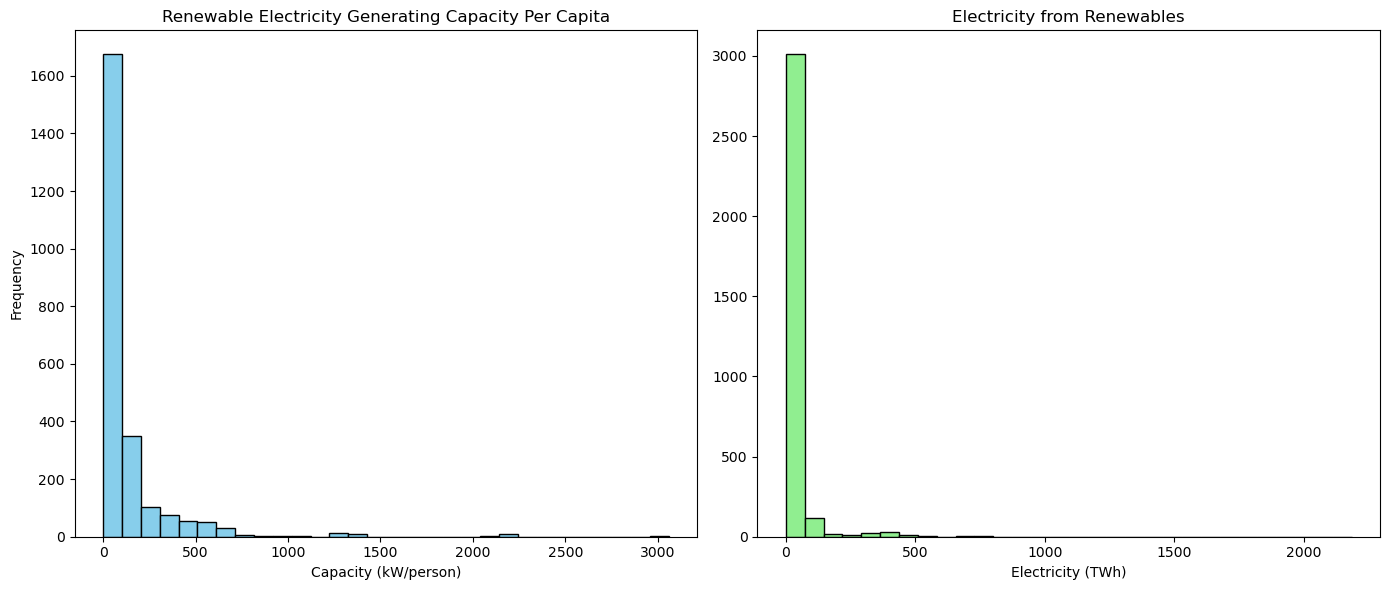

In [ ]:
# Para comparar la capacidad de generación de electricidad renovable per cápita con la electricidad total
# generada a partir de fuentes renovables mediante histogramas, crearemos dos histogramas en el mismo
# gráfico utilizando subplots para una mejor comparación visual.

# Asumiendo que el DataFrame 'global_df' tiene las columnas correctas:
renewable_capacity_col = 'Renewable-electricity-generating-capacity-per-capita'
renewable_electricity_col = 'Electricity from renewables (TWh)'

# Crear la figura y los ejes para dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histograma para la capacidad de generación de electricidad renovable per cápita
axes[0].hist(global_df[renewable_capacity_col].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Renewable Electricity Generating Capacity Per Capita')
axes[0].set_xlabel('Capacity (kW/person)')
axes[0].set_ylabel('Frequency')

# Histograma para la electricidad total generada a partir de fuentes renovables
axes[1].hist(global_df[renewable_electricity_col].dropna(), bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Electricity from Renewables')
axes[1].set_xlabel('Electricity (TWh)')
# No es necesario el label del eje y para el segundo gráfico ya que comparten el mismo eje y

# Ajustar el layout para evitar la superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()


/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_26715/115731543.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['Renewable-electricity-generating-capacity-per-capita'] = pd.to_numeric(latest_data['Renewable-electricity-generating-capacity-per-capita'], errors='coerce')
/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_26715/115731543.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['Electricity from renewables (TWh)'] = pd.to_numeric(latest_data['Electric

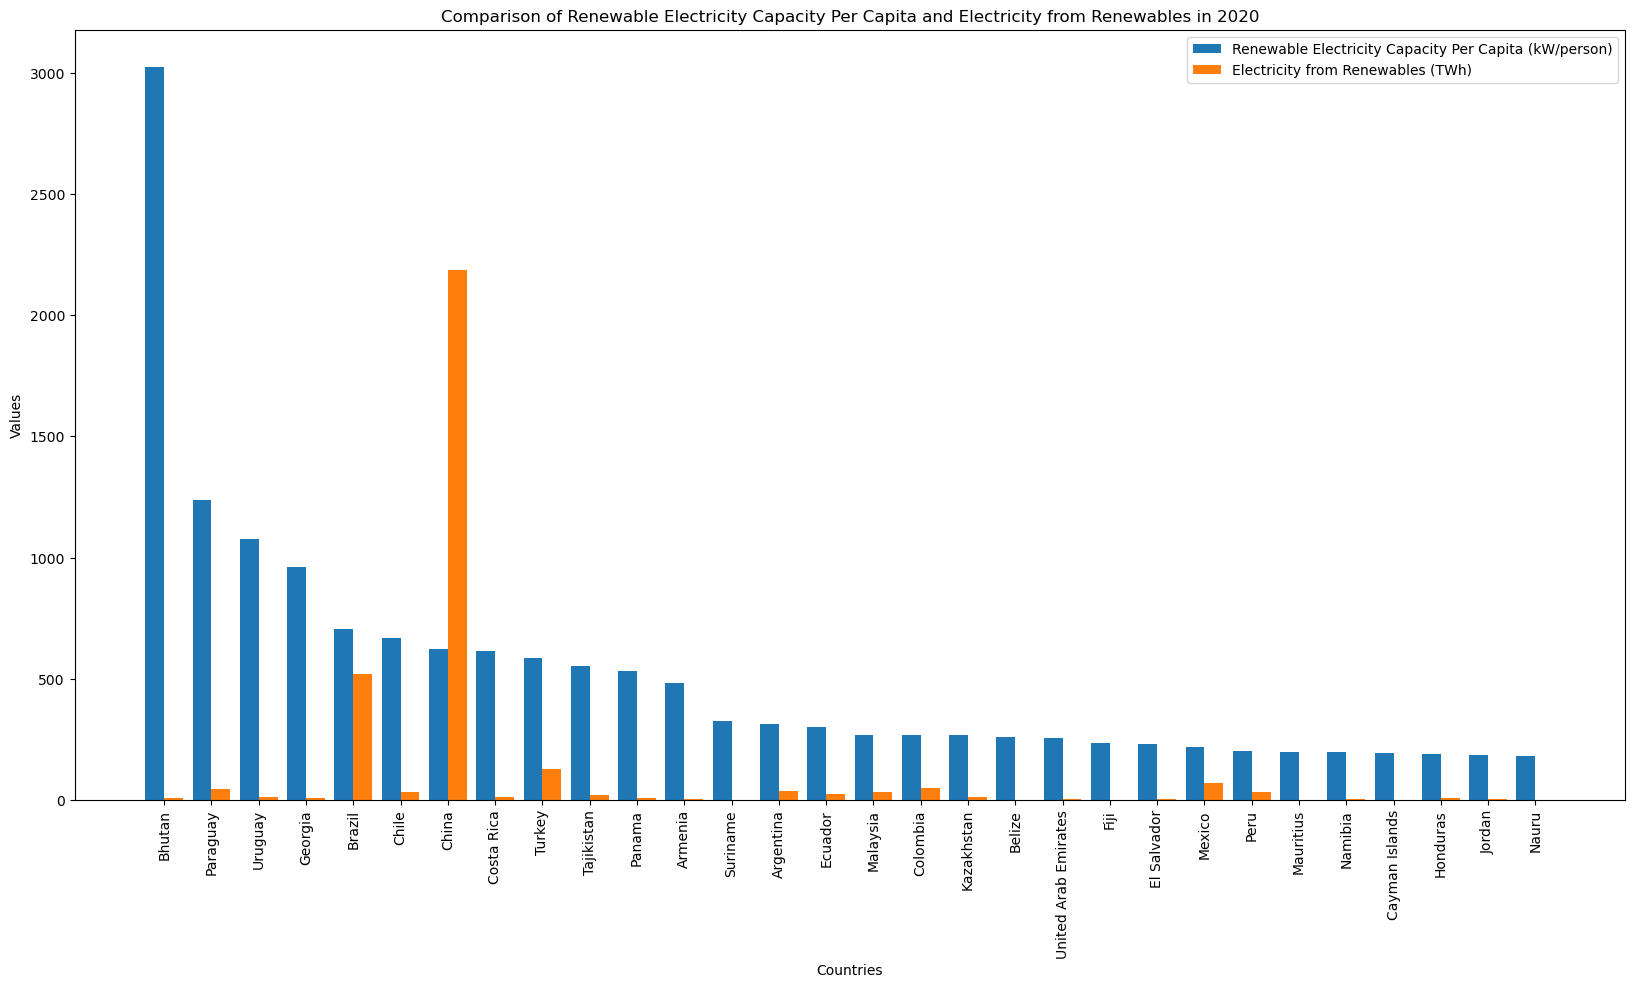

In [ ]:
# Suponiendo que 'global_df' es tu DataFrame principal y que ya ha sido cargado.
# Suponemos también que tenemos los nombres de las columnas correctos y que 'Entity' es la columna con los nombres de los países.

# Primero necesitamos obtener los datos del último año disponible para cada país para asegurarnos
# de que estamos comparando los mismos puntos en el tiempo.
latest_year = global_df['Year'].max()
latest_data = global_df[global_df['Year'] == latest_year]

# Dado que queremos crear un histograma con nombres de países en el eje x, un gráfico de barras podría ser más adecuado.
# Un histograma tradicional no es idóneo para datos categóricos como los nombres de los países.
# En lugar de eso, crearemos un gráfico de barras doble para cada país.

import matplotlib.pyplot as plt

# Necesitamos asegurarnos de que los datos son numéricos
latest_data['Renewable-electricity-generating-capacity-per-capita'] = pd.to_numeric(latest_data['Renewable-electricity-generating-capacity-per-capita'], errors='coerce')
latest_data['Electricity from renewables (TWh)'] = pd.to_numeric(latest_data['Electricity from renewables (TWh)'], errors='coerce')

# Eliminamos posibles NaNs que puedan interferir en el gráfico
latest_data.dropna(subset=['Renewable-electricity-generating-capacity-per-capita', 'Electricity from renewables (TWh)', 'Entity'], inplace=True)

# Obtenemos un subconjunto de los datos si hay demasiados países para mostrar en un solo gráfico
# Por ejemplo, podemos seleccionar los primeros 30 países para mantener el gráfico legible
top_countries = latest_data.nlargest(30, 'Renewable-electricity-generating-capacity-per-capita')

# Creando el gráfico de barras doble
fig, ax = plt.subplots(figsize=(20, 10))

# Índices del eje x para los grupos de barras
ind = range(len(top_countries))

# Barras para la capacidad de generación de electricidad renovable per cápita
ax.bar(ind, top_countries['Renewable-electricity-generating-capacity-per-capita'], width=0.4, label='Renewable Electricity Capacity Per Capita (kW/person)')

# Barras para la electricidad total generada a partir de fuentes renovables
# Movemos las barras un poco a la derecha añadiendo 0.4 al índice para evitar la superposición
ax.bar([i + 0.4 for i in ind], top_countries['Electricity from renewables (TWh)'], width=0.4, label='Electricity from Renewables (TWh)')

# Etiquetas y leyendas
ax.set_xlabel('Countries')
ax.set_ylabel('Values')
ax.set_title('Comparison of Renewable Electricity Capacity Per Capita and Electricity from Renewables in 2020')
ax.set_xticks([i + 0.2 for i in ind])
ax.set_xticklabels(top_countries['Entity'], rotation=90)
ax.legend()

# Mostramos el gráfico
plt.show()



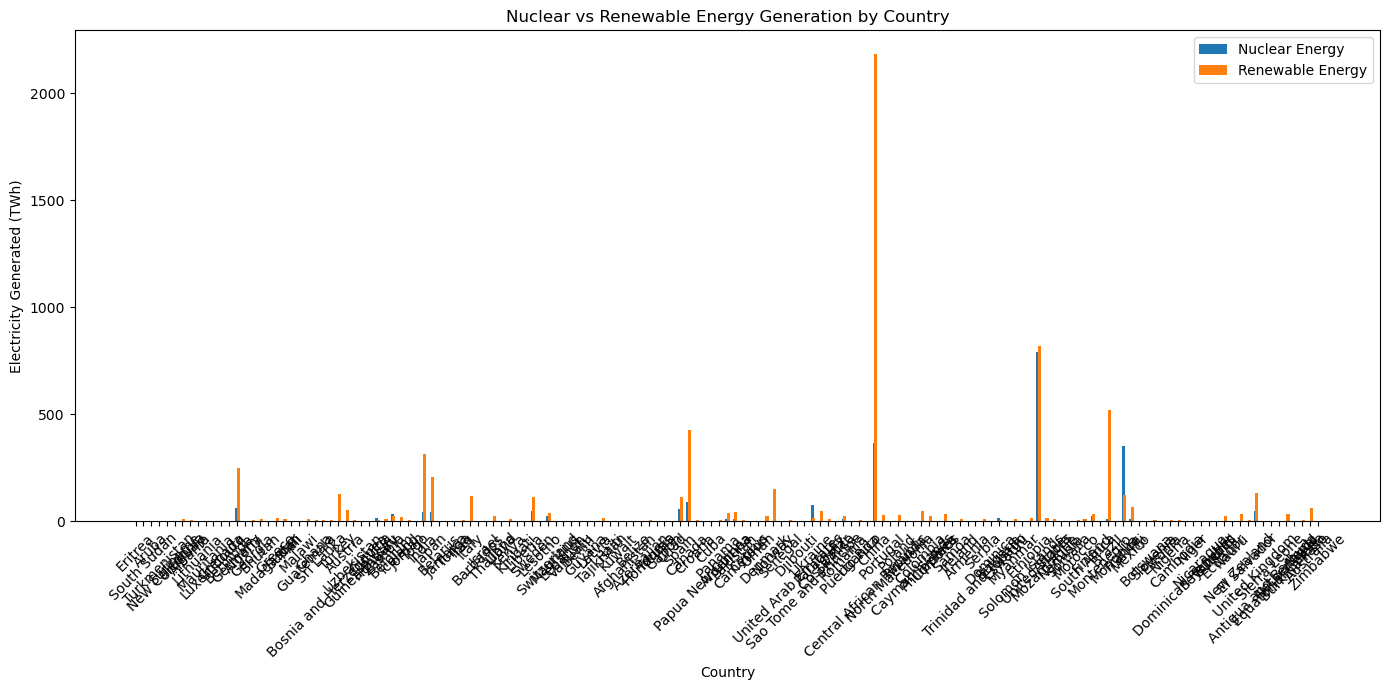

In [ ]:
# Asumiendo que tu DataFrame 'global_df' contiene una columna 'Electricity from renewables (TWh)'
# que incluye la electricidad generada por la energía solar, entre otras fuentes renovables.

# Definimos los nombres de las columnas para la electricidad generada por energía nuclear y renovables
nuclear_col = 'Electricity from nuclear (TWh)'
renewables_col = 'Electricity from renewables (TWh)'

# Filtramos el DataFrame para obtener los datos más recientes de cada país.
# Suponemos que cada país aparece varias veces por diferentes años, así que seleccionamos el año más reciente.
latest_data = global_df.sort_values('Year').drop_duplicates('Entity', keep='last')

# Seleccionamos solo los países que generan tanto energía nuclear como renovable.
countries_with_both = latest_data.dropna(subset=[nuclear_col, renewables_col])

# Ahora generamos el gráfico de barras.
fig, ax = plt.subplots(figsize=(14, 7))

# Barras para energía nuclear.
ax.bar(countries_with_both['Entity'], countries_with_both[nuclear_col], 
       width=0.4, label='Nuclear Energy', align='center')

# Barras para energía renovable, incluyendo solar.
ax.bar(countries_with_both['Entity'], countries_with_both[renewables_col], 
       width=0.4, label='Renewable Energy', align='edge')

# Añadiendo título y etiquetas.
ax.set_title('Nuclear vs Renewable Energy Generation by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Electricity Generated (TWh)')

# Añadiendo la leyenda.
ax.legend()

# Rotar las etiquetas del eje X para mejor legibilidad.
plt.xticks(rotation=45)

# Ajustar el diseño.
plt.tight_layout()

# Mostrar el gráfico.
plt.show()




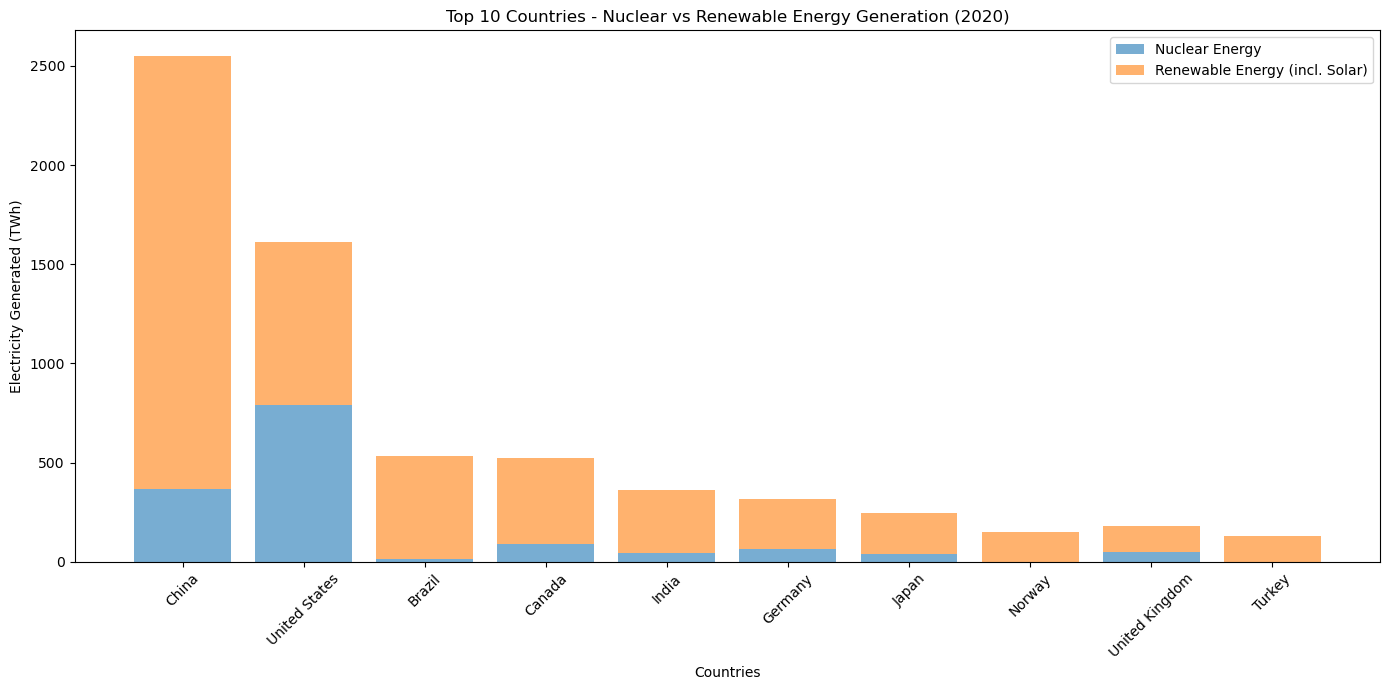

In [ ]:
import matplotlib.pyplot as plt

# Asegúrate de que 'global_df' ya está cargado y que las columnas tienen los nombres correctos.
nuclear_col = 'Electricity from nuclear (TWh)'
renewables_col = 'Electricity from renewables (TWh)'

# Filtrar los datos para el año más reciente disponible para cada país.
latest_data = global_df.sort_values('Year').drop_duplicates('Entity', keep='last')

# Obtener el top 10 de países por capacidad de generación de electricidad renovable.
top10_renewables = latest_data.nlargest(10, renewables_col)

# Preparar los datos para el gráfico.
countries = top10_renewables['Entity']
nuclear_values = top10_renewables[nuclear_col]
renewables_values = top10_renewables[renewables_col]

# Crear el gráfico de barras.
fig, ax = plt.subplots(figsize=(14, 7))

# Configurar las barras para la energía nuclear.
ax.bar(countries, nuclear_values, label='Nuclear Energy', alpha=0.6)

# Configurar las barras para la energía renovable, incluida la solar.
ax.bar(countries, renewables_values, label='Renewable Energy (incl. Solar)', alpha=0.6, bottom=nuclear_values)

# Añadir títulos y etiquetas.
ax.set_xlabel('Countries')
ax.set_ylabel('Electricity Generated (TWh)')
ax.set_title('Top 10 Countries - Nuclear vs Renewable Energy Generation (2020)')
ax.legend()

# Rotar las etiquetas del eje X para mejor legibilidad.
plt.xticks(rotation=45)

# Ajustar el diseño y mostrar el gráfico.
plt.tight_layout()
plt.show()


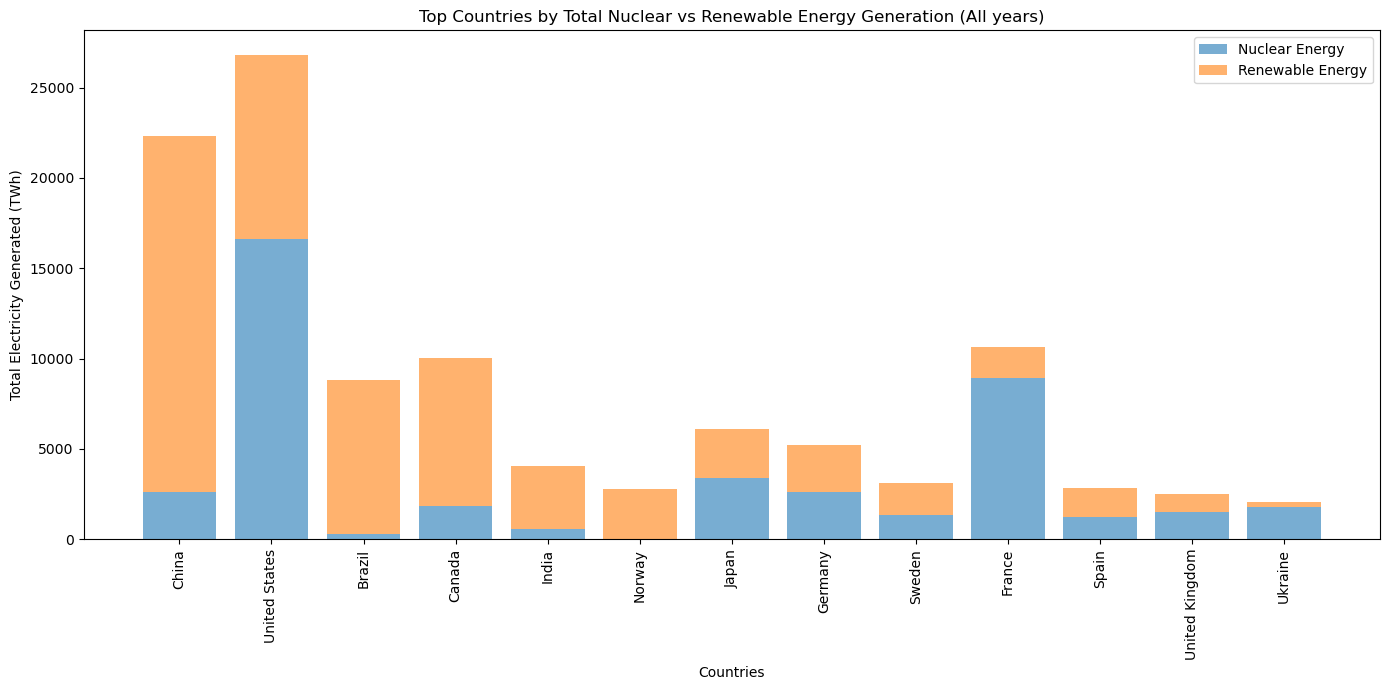

In [ ]:
# Ajustamos el código para considerar todos los años disponibles en lugar de solo el más reciente.
# Calcularemos la suma total de electricidad generada de fuentes nucleares y renovables por país
# y luego seleccionaremos el top 10 de cada categoría para comparar.

# Agrupamos por país y sumamos sobre todos los años para cada fuente de energía
grouped_data = global_df.groupby('Entity')[[nuclear_col, renewables_col]].sum()

# Obtenemos los top 10 países por generación total de energía renovable
top10_renewables_total = grouped_data.nlargest(10, renewables_col)

# Obtenemos los top 10 países por generación total de energía nuclear
top10_nuclear_total = grouped_data.nlargest(10, nuclear_col)

# Unificamos ambos top 10 para tener una lista completa de países a considerar
top_countries = top10_renewables_total.index.union(top10_nuclear_total.index)

# Filtramos los datos originales para incluir solo estos países
comparison_data = grouped_data.loc[top_countries]

# Ordenamos por la generación de energía renovable para el gráfico
comparison_data = comparison_data.sort_values(by=renewables_col, ascending=False)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(14, 7))

# Configurar las barras para la energía nuclear
ax.bar(comparison_data.index, comparison_data[nuclear_col], label='Nuclear Energy', alpha=0.6)

# Configurar las barras para la energía renovable, incluida la solar
ax.bar(comparison_data.index, comparison_data[renewables_col], 
       bottom=comparison_data[nuclear_col], label='Renewable Energy', alpha=0.6)

# Añadir títulos y etiquetas
ax.set_xlabel('Countries')
ax.set_ylabel('Total Electricity Generated (TWh)')
ax.set_title('Top Countries by Total Nuclear vs Renewable Energy Generation (All years)')
ax.legend()

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=90)  # Rotación de 90 grados para evitar la superposición de etiquetas

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


In [7]:
print(global_df.columns)  # Imprime todos los nombres de las columnas para confirmar su existencia

# Verificar los tipos de datos de las columnas de interés
print(global_df['Renewable-electricity-generating-capacity-per-capita'].dtype)
print(global_df['Density'].dtype)

# Contar cuántos valores no numéricos o NaN hay en estas columnas
print(global_df['Renewable-electricity-generating-capacity-per-capita'].isna().sum())
print(global_df['Density'].isna().sum())

# Opcional: mostrar las primeras filas de las columnas de interés para inspeccionar los datos
print(global_df[['Renewable-electricity-generating-capacity-per-capita', 'Density']].head())


Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')
float64
object
931
1
   Renewable-electricity-generating-capacity-per-capita Density
0                                               9.22         60
1                            

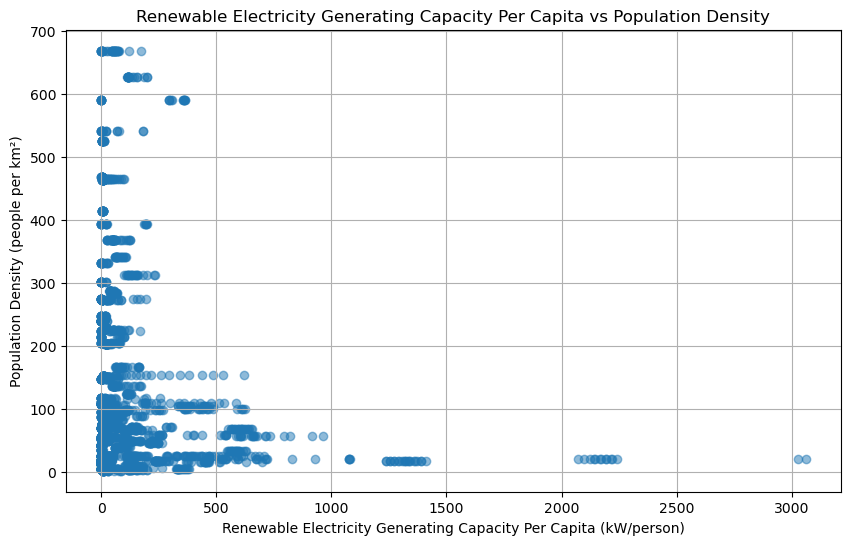

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'Density' a numérica, forzando los errores a NaN
global_df['Density'] = pd.to_numeric(global_df['Density'], errors='coerce')

# Ahora eliminamos cualquier fila que contenga NaN en esas dos columnas de interés
global_df = global_df.dropna(subset=['Renewable-electricity-generating-capacity-per-capita', 'Density'])

# Crear el gráfico de dispersión usando solo las filas con valores válidos
plt.figure(figsize=(10, 6))
plt.scatter(global_df['Renewable-electricity-generating-capacity-per-capita'], global_df['Density'], alpha=0.5)
plt.title('Renewable Electricity Generating Capacity Per Capita vs Population Density')
plt.xlabel('Renewable Electricity Generating Capacity Per Capita (kW/person)')
plt.ylabel('Population Density (people per km²)')
plt.grid(True)
plt.show()


/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_28580/2196257735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_df['Density'] = pd.to_numeric(global_df['Density'], errors='coerce')


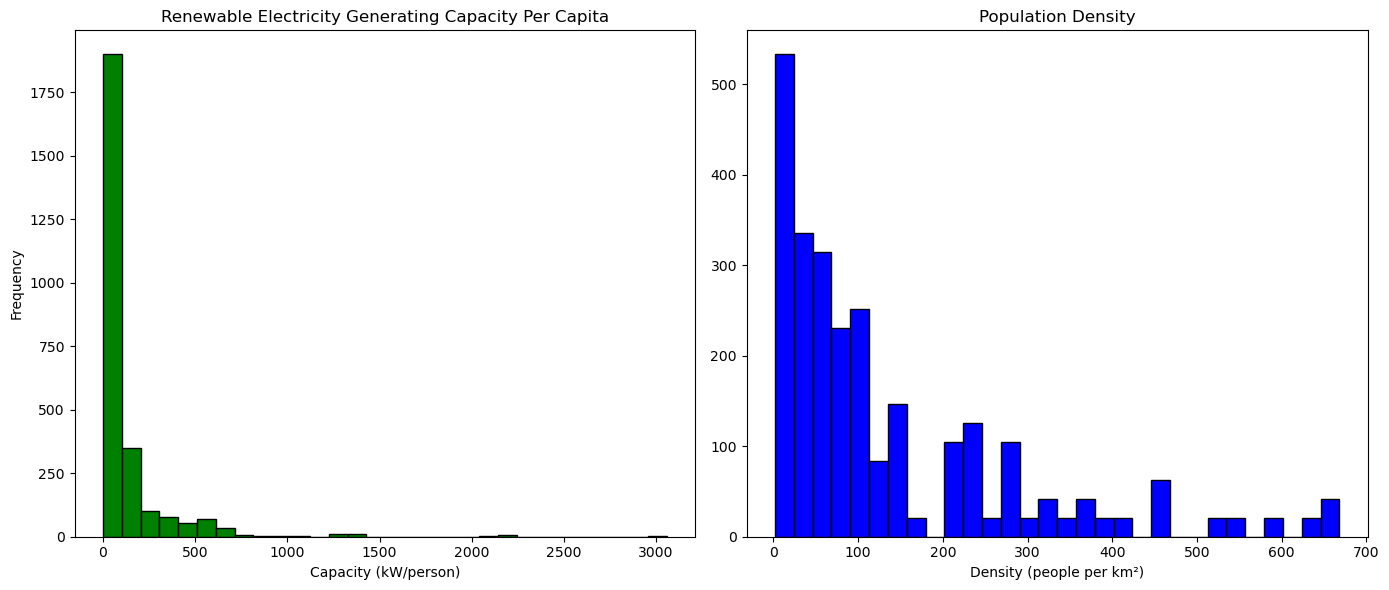

In [9]:
# Primero, debemos asegurarnos de que la columna 'Density' es numérica.
# La convertimos a float, forzando los errores a NaN para luego poder eliminar dichas filas.
global_df['Density'] = pd.to_numeric(global_df['Density'], errors='coerce')

# Luego, eliminamos las filas con valores NaN en ambas columnas.
global_df_clean = global_df.dropna(subset=['Renewable-electricity-generating-capacity-per-capita', 'Density'])

# Ahora, creamos histogramas separados para cada columna de interés.
plt.figure(figsize=(14, 6))

# Histograma para 'Renewable-electricity-generating-capacity-per-capita'
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
plt.hist(global_df_clean['Renewable-electricity-generating-capacity-per-capita'], bins=30, color='green', edgecolor='black')
plt.title('Renewable Electricity Generating Capacity Per Capita')
plt.xlabel('Capacity (kW/person)')
plt.ylabel('Frequency')

# Histograma para 'Density'
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
plt.hist(global_df_clean['Density'], bins=30, color='blue', edgecolor='black')
plt.title('Population Density')
plt.xlabel('Density (people per km²)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



Empty DataFrame
Columns: [Entity, Year, Access to electricity (% of population), Access to clean fuels for cooking, Renewable-electricity-generating-capacity-per-capita, Financial flows to developing countries (US $), Renewable energy share in the total final energy consumption (%), Electricity from fossil fuels (TWh), Electricity from nuclear (TWh), Electricity from renewables (TWh), Low-carbon electricity (% electricity), Primary energy consumption per capita (kWh/person), Energy intensity level of primary energy (MJ/$2017 PPP GDP), Value_co2_emissions_kt_by_country, Renewables (% equivalent primary energy), gdp_growth, gdp_per_capita, Density, Land Area(Km2), Latitude, Longitude]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [Year, Renewable-electricity-generating-capacity-per-capita, Density]
Index: []


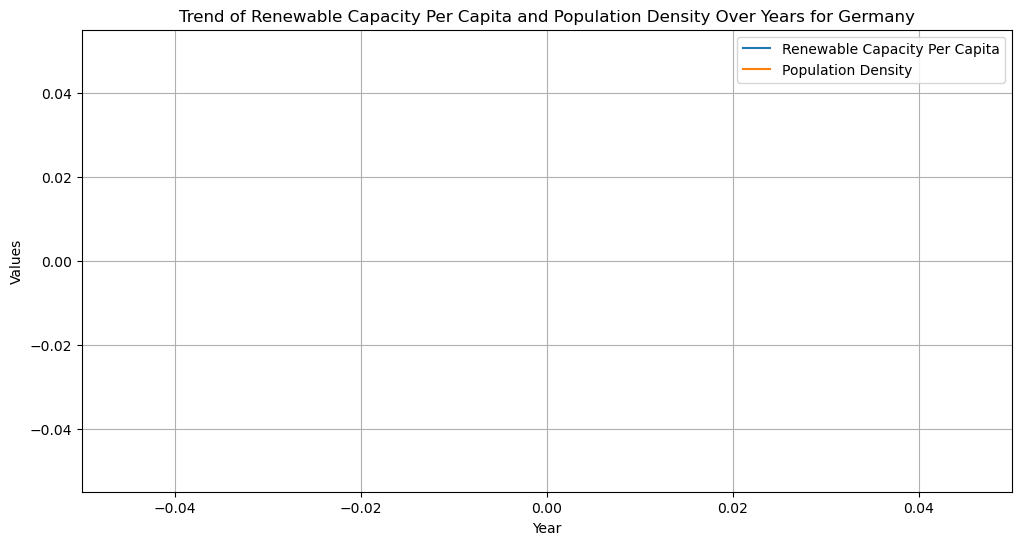

In [14]:
import matplotlib.pyplot as plt

# Supongamos que 'global_df' ya está cargado y que las columnas tienen los nombres correctos.
# Además, asegúrate de que 'global_df' no esté vacío después de filtrar por un país.
print(global_df[global_df['Entity'] == 'Germany'])

# Si los datos se ven bien, intenta graficar de nuevo, asegurándote de que los años se están manejando como numéricos y no como strings.
country_data = global_df[global_df['Entity'] == 'Germany']
country_data_sorted = country_data.sort_values('Year')

# Revisa si hay datos para graficar después del filtrado y la ordenación
print(country_data_sorted[['Year', 'Renewable-electricity-generating-capacity-per-capita', 'Density']])

# Intenta graficar
plt.figure(figsize=(12, 6))
plt.plot(country_data_sorted['Year'], country_data_sorted['Renewable-electricity-generating-capacity-per-capita'], label='Renewable Capacity Per Capita')
plt.plot(country_data_sorted['Year'], country_data_sorted['Density'], label='Population Density')

plt.title('Trend of Renewable Capacity Per Capita and Population Density Over Years for Germany')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Ajusta los límites del eje si es necesario
plt.autoscale(enable=True, axis='x', tight=True)

plt.show()


In [13]:
#Usar una APIkeys con los paises con su longitud y latitud, para que muestren un mapa con la ubicacion de los paises
#que mas consumen cada tipo de energia. Y que también incluya un punto en el que muestre que tipo de energia se consume más
api_key="3bca82933cde424aab3d225b3be12558"

/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_28580/1498184599.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_28580/1498184599.py:19: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  latest_data['Most consumed energy type'] = latest_data[energy_types].idxmax(axis=1)
/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_28580/1498184599.py:36: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_type.plot(ax=ax, label=energy_type.split(' (')[0],  # Etiqueta sin el '(TWh)'


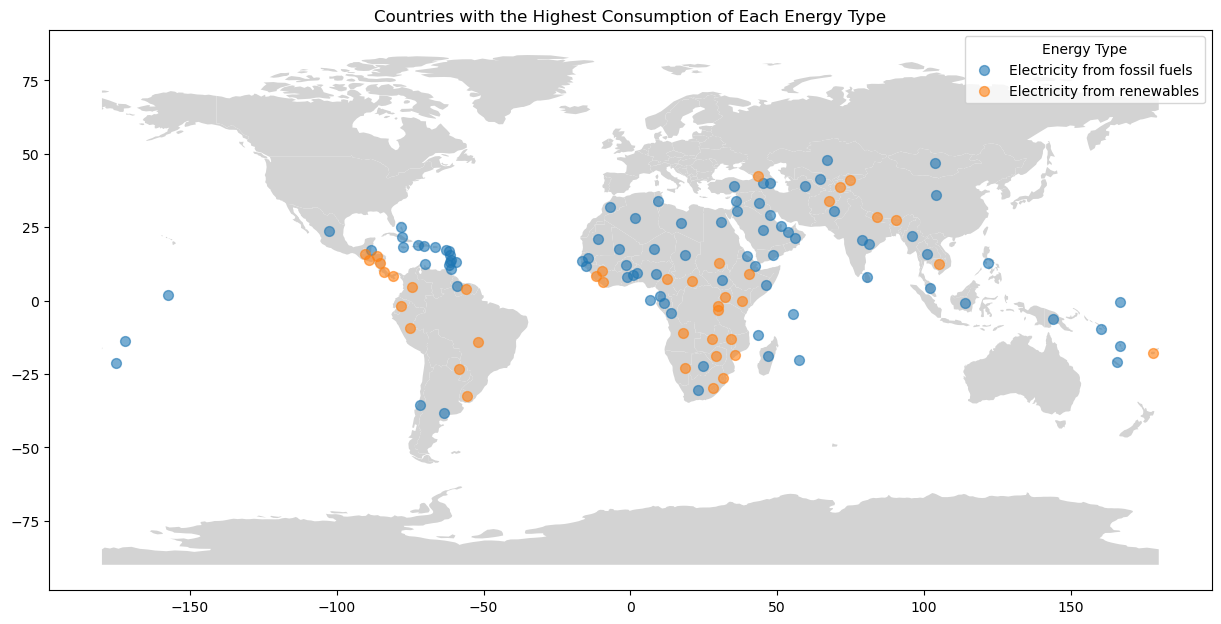

In [21]:
# Para mostrar en un mapa la ubicación de los países que más consumen por cada tipo de energía,
# primero debemos identificar cuál es el tipo de energía más consumido por país. Luego, utilizaremos
# esa información para crear un mapa con marcadores que muestren el tipo de energía más consumido en cada país.

import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Cargamos un mapa mundial para el fondo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Identificar el tipo de energía más consumido por país en el último año registrado
latest_data = global_df.sort_values('Year').drop_duplicates('Entity', keep='last')

# Tipos de energía a considerar (estos nombres deben coincidir exactamente con los de tus columnas)
energy_types = ['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']

# Determinar el tipo de energía más consumido por país
latest_data['Most consumed energy type'] = latest_data[energy_types].idxmax(axis=1)

# Convertimos los datos a un GeoDataFrame
gdf = gpd.GeoDataFrame(latest_data, geometry=gpd.points_from_xy(latest_data['Longitude'], latest_data['Latitude']))

# Vamos a crear un mapa con un punto por cada país indicando su mayor tipo de consumo de energía
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Dibujamos el mapa mundial
world.plot(ax=ax, color='lightgrey')

# Dibujamos los puntos de cada país
for energy_type in energy_types:
    # Filtrar los países que más consumen cada tipo de energía
    gdf_type = gdf[gdf['Most consumed energy type'] == energy_type]

    # Dibujamos los puntos en el mapa
    gdf_type.plot(ax=ax, label=energy_type.split(' (')[0],  # Etiqueta sin el '(TWh)'
                  marker='o', markersize=50, alpha=0.6)

# Añadir título y leyenda al gráfico
plt.title('Countries with the Highest Consumption of Each Energy Type')
ax.legend(title='Energy Type')
plt.show()

# Nota: Este código asume que las columnas 'Longitude' y 'Latitude' existen en tu DataFrame
# y que contienen las coordenadas geográficas de cada país. También asume que los nombres
# de las columnas de tipos de energía en 'energy_types' coinciden exactamente con los de tu DataFrame. 
# Si este no es el caso, por favor ajusta los nombres de las columnas y asegúrate de que las
# coordenadas geográficas estén disponibles para su uso en la visualización.


/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_28580/2708310308.py:14: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  latest_data['Most consumed energy type'] = latest_data[energy_types].idxmax(axis=1)
/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_28580/2708310308.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['Most consumed energy type'] = latest_data[energy_types].idxmax(axis=1)
/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_28580/2708310308.py:24: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturaleart

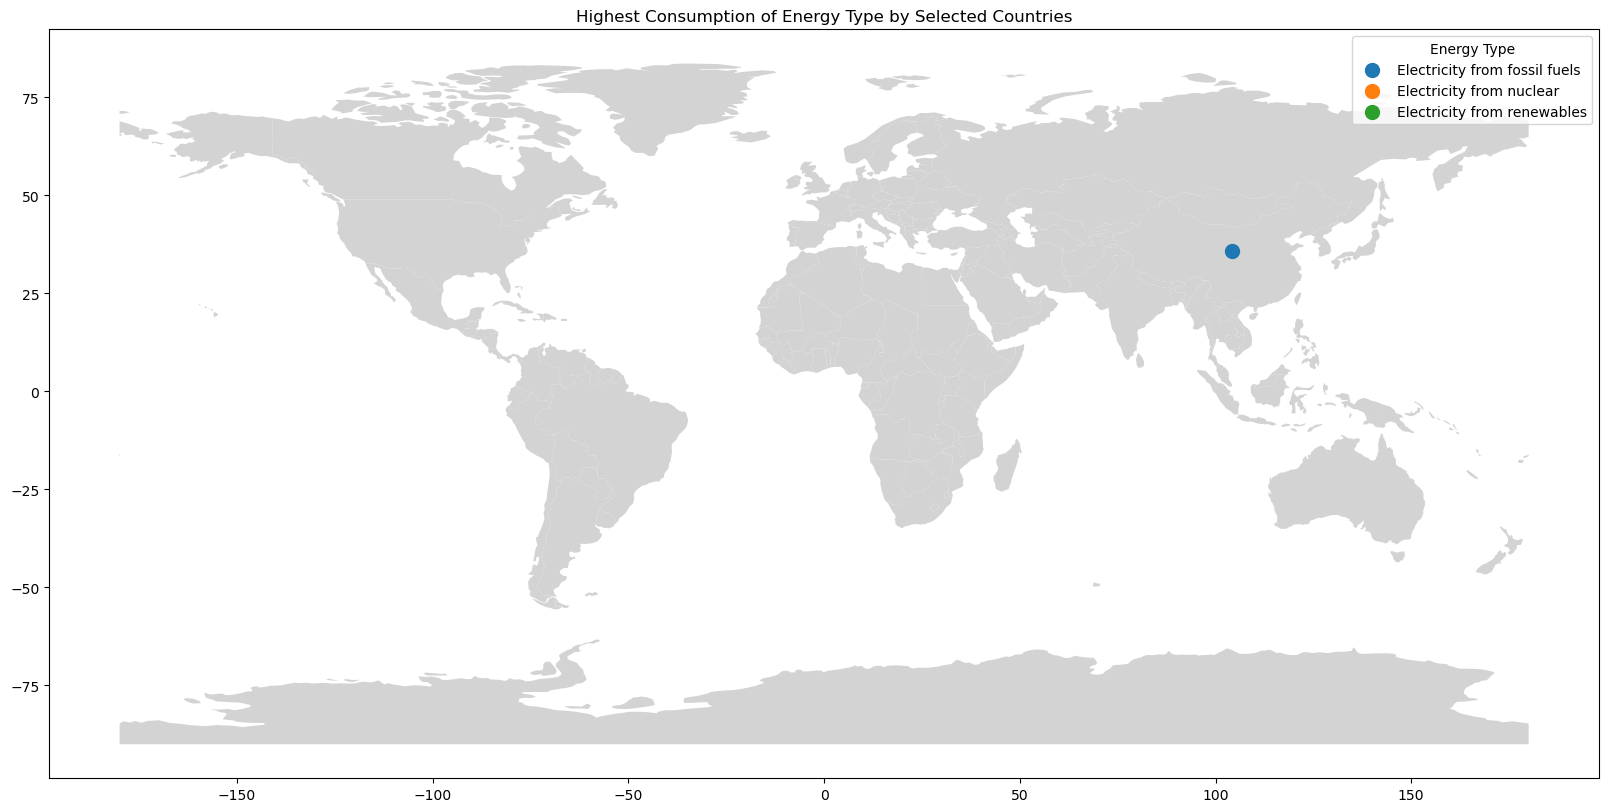

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Supongamos que 'global_df' es tu DataFrame y tiene columnas para cada tipo de consumo de energía y 'Latitude' y 'Longitude' para coordenadas.

# Añadir la columna de energía nuclear para la comparación
energy_types = ['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']

# Filtrar por el último año disponible para cada país
latest_year = global_df['Year'].max()
latest_data = global_df[global_df['Year'] == latest_year]

# Identificar el tipo de energía más consumido por país
latest_data['Most consumed energy type'] = latest_data[energy_types].idxmax(axis=1)

# Filtrar para incluir solo los países de interés
countries_of_interest = ['Europe', 'China', 'Japan', 'United States']  # Asumiendo que tienes una lista de países europeos en 'Europe'
latest_data = latest_data[latest_data['Entity'].isin(countries_of_interest)]

# Convertir a GeoDataFrame
gdf = gpd.GeoDataFrame(latest_data, geometry=gpd.points_from_xy(latest_data['Longitude'], latest_data['Latitude']))

# Crear el mapa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
world.plot(ax=ax, color='lightgrey')

# Colorear los puntos basados en el tipo de energía más consumido
for energy_type in energy_types:
    subset = gdf[gdf['Most consumed energy type'] == energy_type]
    ax.scatter(subset['Longitude'], subset['Latitude'], label=energy_type.split(' (')[0], s=100)

# Agregar leyenda y título
ax.legend(title='Energy Type')
ax.set_title('Highest Consumption of Energy Type by Selected Countries')

plt.show()
